In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




In [17]:
df = pd.read_csv('data/train.csv')
df.head()

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,F,13,U,GT3,A,4,4,2,2,...,no,no,yes,yes,no,4,3,3,4,22
1,2,F,12,U,GT3,T,1,1,1,2,...,no,no,no,yes,yes,5,3,3,2,31
2,3,F,10,U,LE3,T,1,1,1,2,...,no,no,yes,yes,yes,4,3,3,6,37
3,4,F,10,U,GT3,T,4,2,1,3,...,no,yes,yes,yes,yes,3,2,5,0,42
4,5,F,11,U,GT3,T,3,3,1,2,...,no,no,yes,yes,no,4,3,5,0,37


In [5]:
df.tail()

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
320,321,F,13,U,GT3,T,4,4,1,2,...,no,yes,yes,yes,yes,2,4,4,2,39
321,322,F,12,U,GT3,T,2,2,3,3,...,no,no,yes,yes,yes,4,2,1,8,43
322,323,F,14,R,GT3,T,3,2,1,2,...,no,no,yes,no,yes,3,3,3,0,27
323,324,M,13,U,LE3,T,4,3,2,1,...,no,yes,yes,yes,yes,4,2,1,0,30
324,325,M,13,U,GT3,T,1,2,2,1,...,no,no,no,no,yes,3,4,4,10,31


In [6]:
df.rename(columns={'S/N':'Roll no'}, inplace=True)

In [7]:
df.head()

,Roll no,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,F,13,U,GT3,A,4,4,2,2,...,no,no,yes,yes,no,4,3,3,4,22
1,2,F,12,U,GT3,T,1,1,1,2,...,no,no,no,yes,yes,5,3,3,2,31
2,3,F,10,U,LE3,T,1,1,1,2,...,no,no,yes,yes,yes,4,3,3,6,37
3,4,F,10,U,GT3,T,4,2,1,3,...,no,yes,yes,yes,yes,3,2,5,0,42
4,5,F,11,U,GT3,T,3,3,1,2,...,no,no,yes,yes,no,4,3,5,0,37


In [8]:
df.describe()

,Roll no,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,Score
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,163.000000,11.320000,2.710769,2.476923,1.449231,1.956923,0.184615,3.926154,3.178462,3.590769,4.341538,35.713846
std,93.963645,1.123157,1.086977,1.093015,0.725234,0.819133,0.579812,0.913256,0.987029,1.438634,5.200038,6.732175
min,1.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,20.000000
25%,82.000000,10.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,0.000000,31.000000
50%,163.000000,11.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,4.000000,2.000000,36.000000
75%,244.000000,12.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,5.000000,6.000000,40.000000
max,325.000000,17.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,32.000000,53.000000


In [10]:
df.columns

Index(['Roll no', 'Gender', 'Age', 'Location', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel',
       'freetime', 'health', 'absences', 'Score'],
      dtype='object')

In [14]:
# Checking for the missing value
df.isnull().sum(0)


Roll no       0
Gender        0
Age           0
Location      0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
health        0
absences      0
Score         0
dtype: int64

In [18]:

#Checking the duplicate data
df.duplicated().sum()


0

In [21]:
corr = df.corr()
corr

/tmp/ipykernel_8979/2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,S/N,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,Score
S/N,1.000000,0.673927,-0.209204,-0.175051,0.083653,-0.047959,0.071664,-0.047764,-0.073978,-0.075734,0.185527,-0.078188
Age,0.673927,1.000000,-0.146428,-0.192583,0.035163,-0.068840,0.307116,-0.019017,-0.062809,-0.033313,0.270823,-0.218478
Medu,-0.209204,-0.146428,1.000000,0.625634,-0.210531,0.089956,-0.203949,-0.002927,0.019491,-0.030529,-0.032706,0.234127
Fedu,-0.175051,-0.192583,0.625634,1.000000,-0.162093,-0.004561,-0.178322,0.019931,0.018134,0.008697,0.059223,0.173798
traveltime,0.083653,0.035163,-0.210531,-0.162093,1.000000,-0.092015,0.081078,0.008302,-0.030421,-0.036245,0.037758,-0.123410
studytime,-0.047959,-0.068840,0.089956,-0.004561,-0.092015,1.000000,-0.210651,-0.024894,-0.127890,-0.070006,-0.129136,0.219394
failures,0.071664,0.307116,-0.203949,-0.178322,0.081078,-0.210651,1.000000,-0.009147,0.098652,0.046451,0.174544,-0.408658
famrel,-0.047764,-0.019017,-0.002927,0.019931,0.008302,-0.024894,-0.009147,1.000000,0.155049,0.160162,-0.086311,0.007596
freetime,-0.073978,-0.062809,0.019491,0.018134,-0.030421,-0.127890,0.098652,0.155049,1.000000,0.095062,-0.046790,-0.050816
health,-0.075734,-0.033313,-0.030529,0.008697,-0.036245,-0.070006,0.046451,0.160162,0.095062,1.000000,-0.064186,-0.157126


# Data Visualisation

<AxesSubplot: >

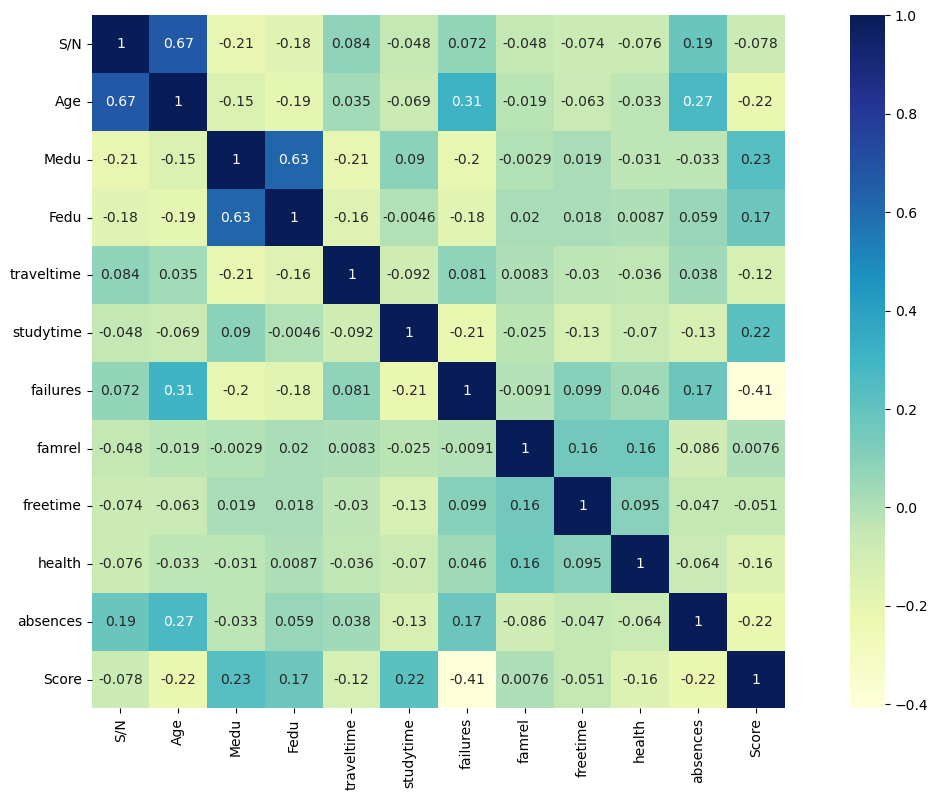

In [25]:
plt.figure(figsize = (17, 9))
sns.heatmap(corr, annot = True, cmap="YlGnBu", square=True)

visualising between scores and failures

<AxesSubplot: xlabel='Score', ylabel='failures'>

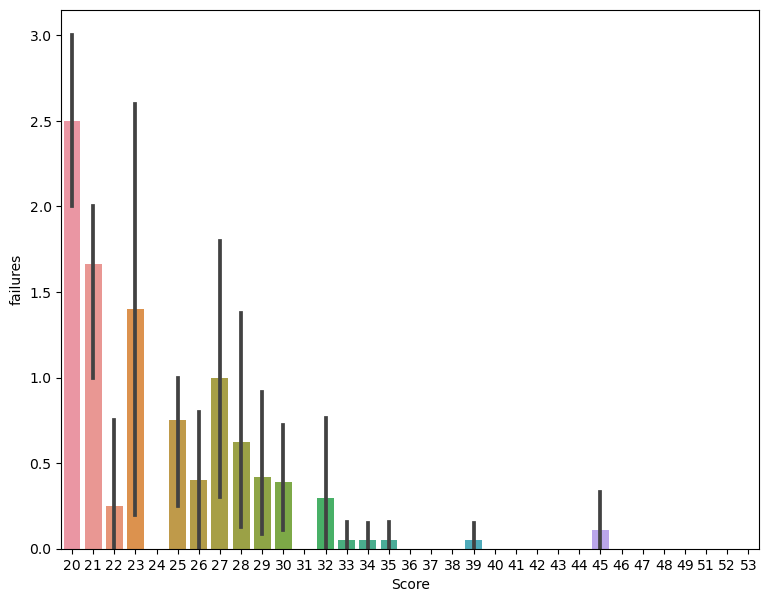

In [26]:


plt.figure(figsize = (9, 7))
sns.barplot(x = 'Score', y ='failures', data = df)





As per the above visualizations you can see If scores are low there is high chance of failure which impacts performance.

Visualizing between Internet and the score


<AxesSubplot: xlabel='internet', ylabel='count'>

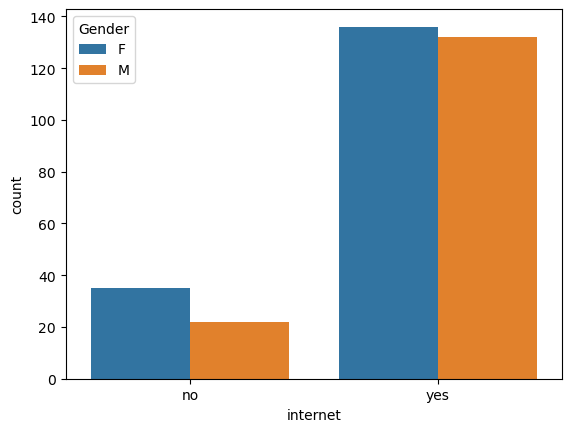

In [27]:
#univariate Analysis for finding how many people using internet
sns.countplot(x = 'internet',data = df, hue = 'Gender')

<AxesSubplot: xlabel='internet', ylabel='Score'>

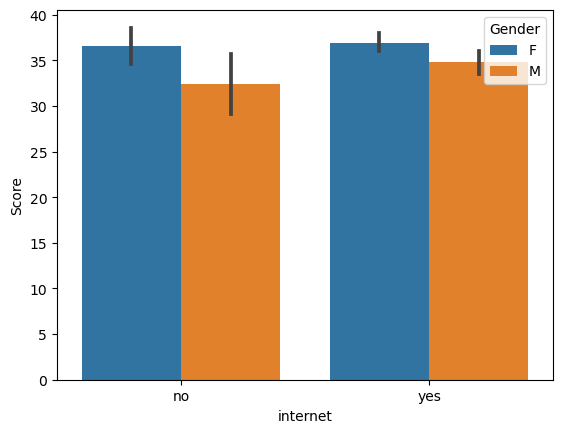

In [28]:
sns.barplot(x = 'internet', y = 'Score', data = df, hue = 'Gender')



So As per the above two visualizations there are huge number of students using internet but it slightly helped to improve the performance of students

Visualizing data between family-size and scores


<AxesSubplot: xlabel='famsize', ylabel='Score'>

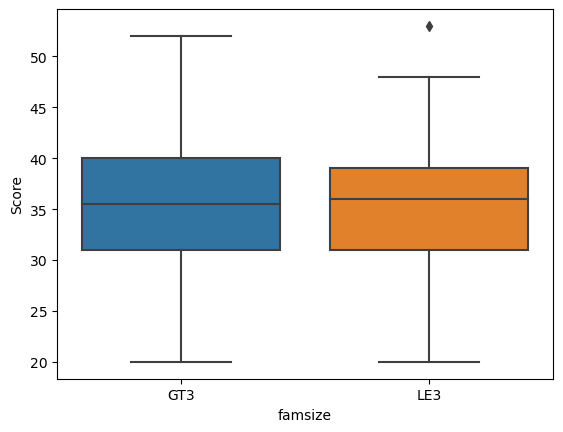

In [29]:
sns.boxplot(x='famsize',y='Score',data=df)



As we can see if the family members are Greater than 3 that students are well performing than LE3 .

Visualizing between Scores and absences


<AxesSubplot: xlabel='absences', ylabel='Score'>

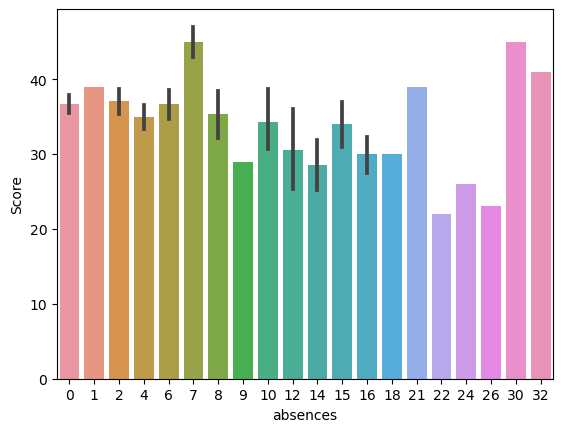

In [30]:
sns.barplot(x = 'absences', y = 'Score', data = df)

Visualization between mother education and score

<AxesSubplot: xlabel='Medu', ylabel='Score'>

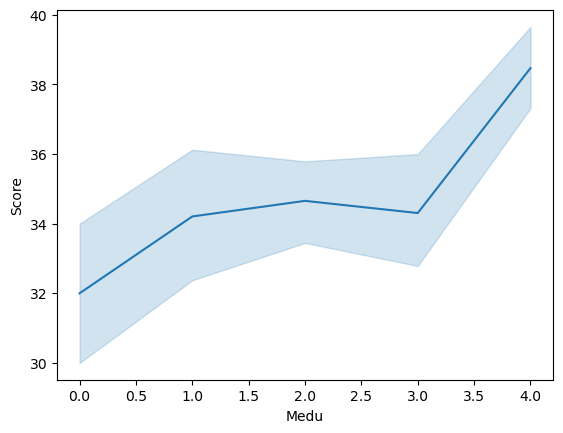

In [31]:


sns.lineplot(x = 'Medu', y = 'Score', data = df)





Visualizing between Study Time and Score


<AxesSubplot: xlabel='studytime', ylabel='Score'>

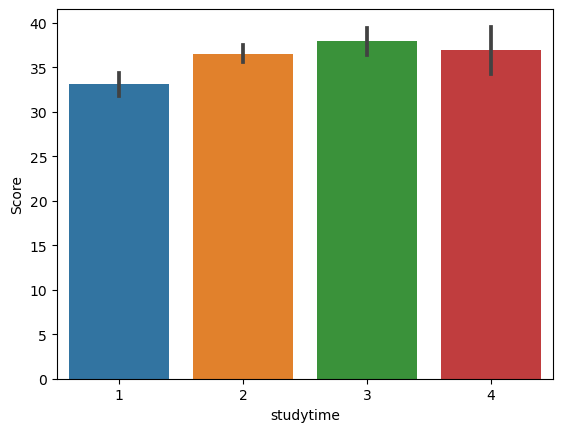

In [32]:
sns.barplot(x = 'studytime', y = 'Score', data = df)

Above Visualizations are showing the increasing trends for those study upto 10 hours but it is slightly low for those studying >= 10 hours

<AxesSubplot: xlabel='paid', ylabel='count'>

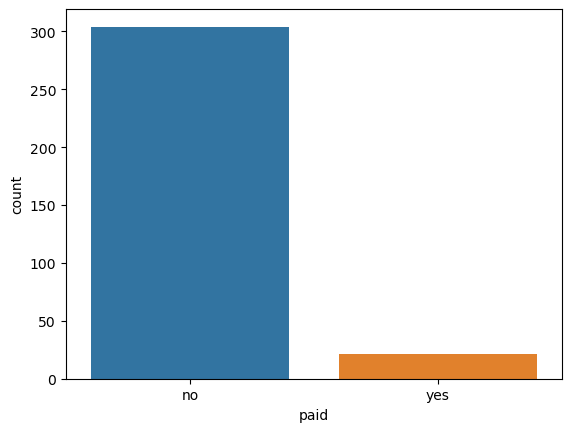

In [33]:
sns.countplot(x = 'paid', data = df)

less number of student paid for extra classes

#### analysis for activities

<AxesSubplot: xlabel='activities', ylabel='count'>

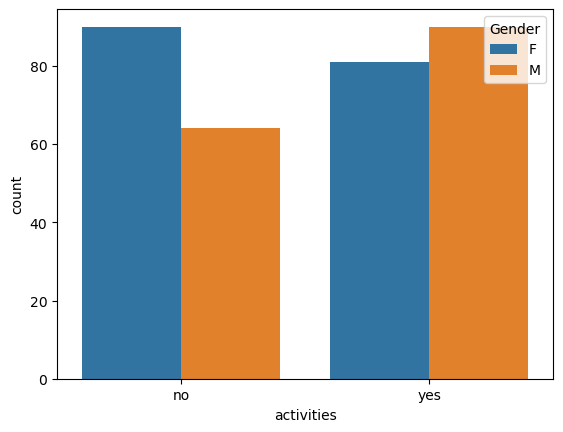

In [34]:
sns.countplot(x = 'activities', data = df, hue = 'Gender')

Female students participation is high

<AxesSubplot: xlabel='activities', ylabel='Score'>

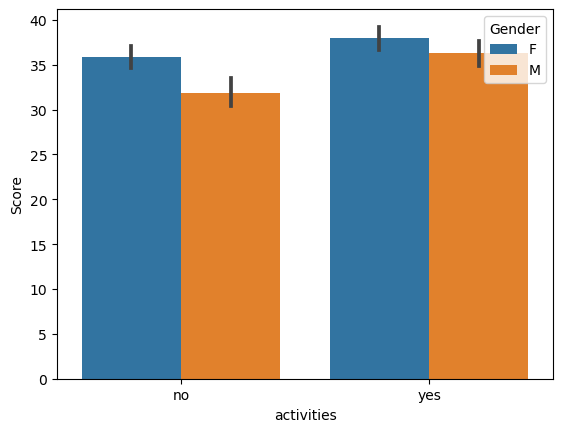

In [35]:
sns.barplot(x = 'activities', y = 'Score', data = df, hue = 'Gender')

So From the above visualizations those who are taking part in extra curricular activities are having high scores then those who are not taking part